In [1]:
# 차원축소는 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
# 저장공간을 줄이고 시각화하기 쉬우며, 다른 알고리즘의 성능을 향상할 수 있다.
# 주성분 분석은 차원 축소 알고리즘의 하나로, 데이터에 가장 분산이 큰 방향을 찾는 방법인데 이런 방향을 주성분이라고 부른다.
# 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음. 
# 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.
# 설명된 분산은 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [6]:
from sklearn.decomposition import PCA
# 주성분의 개수 지정을 꼭 해줘야함 
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [7]:
pca.components_.shape

(50, 10000)

In [8]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10 
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

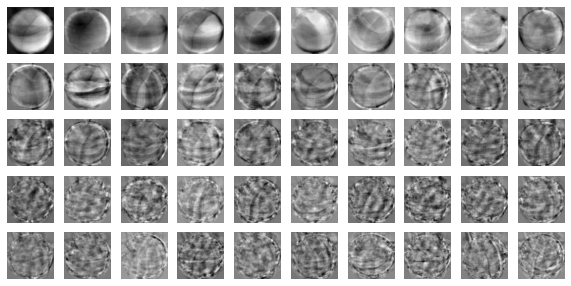

In [11]:
# 주성분을 이미지로 출력해보기
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것. 데이터셋에 있는 어떤 특징을 잡아낸거라고 생각해도 괜찮음.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
# 주성분을 찾았기 때문에 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음.
# 원본 데이터를 각 주성분으로 분해하는 것 같은 이치 
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [14]:
# 원본데이터 재구성해보기 
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

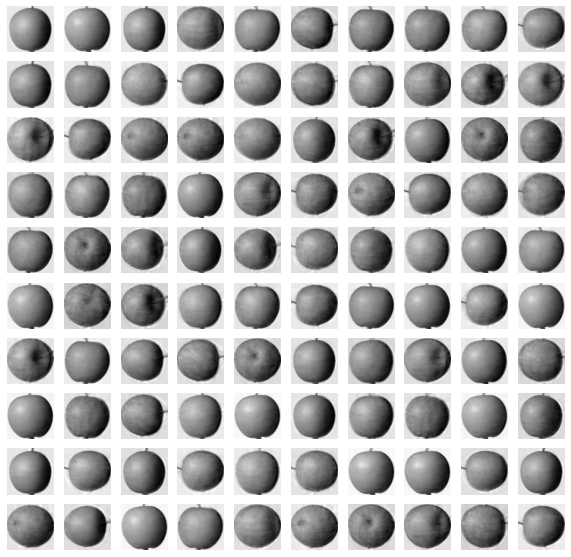

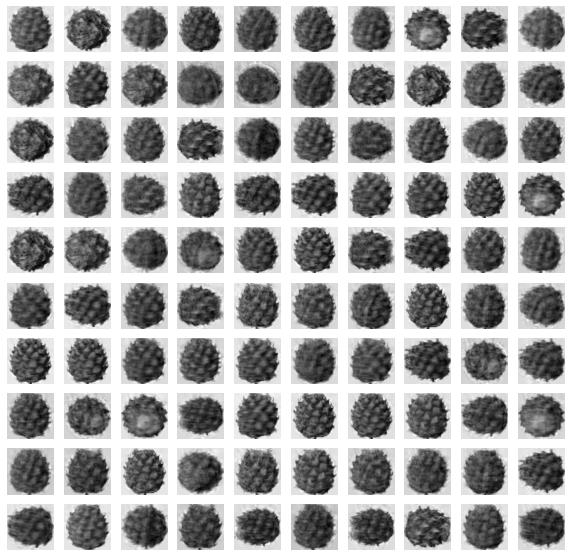

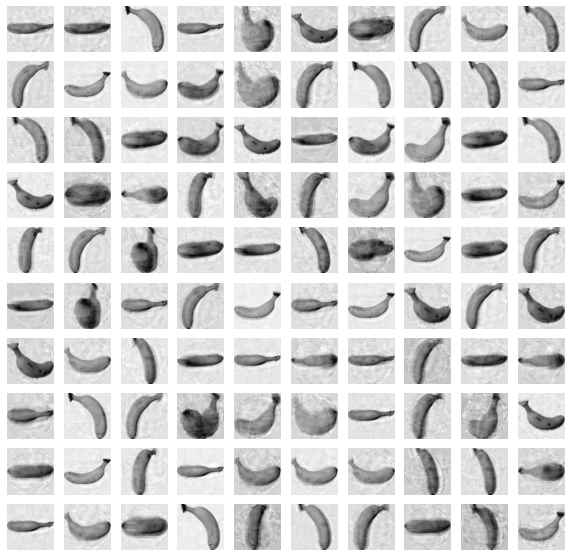

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [16]:
# 설명된 분산: 주성분이 원본데이터의 분산을 얼마나 잘 나타내고 있을까?
np.sum(pca.explained_variance_ratio_)

0.9215626688656808

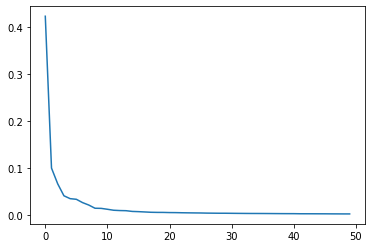

In [17]:
plt.plot(pca.explained_variance_ratio_)

In [18]:
# 차원 축소한 데이터를 다른 알고리즘에 적용해보기 
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

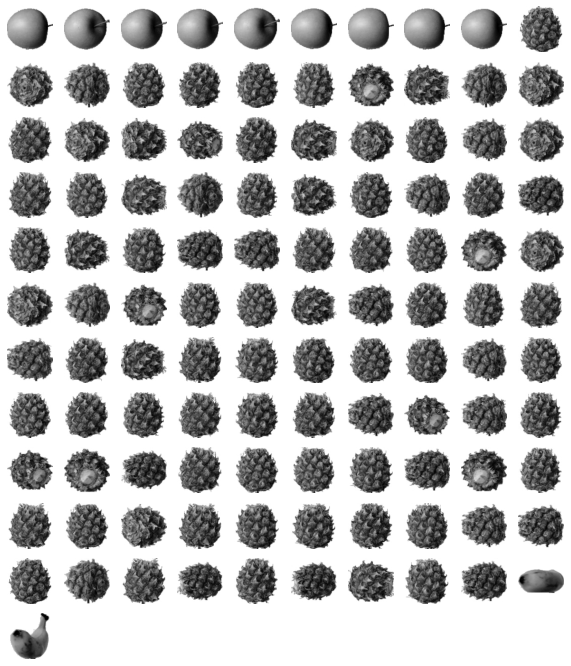

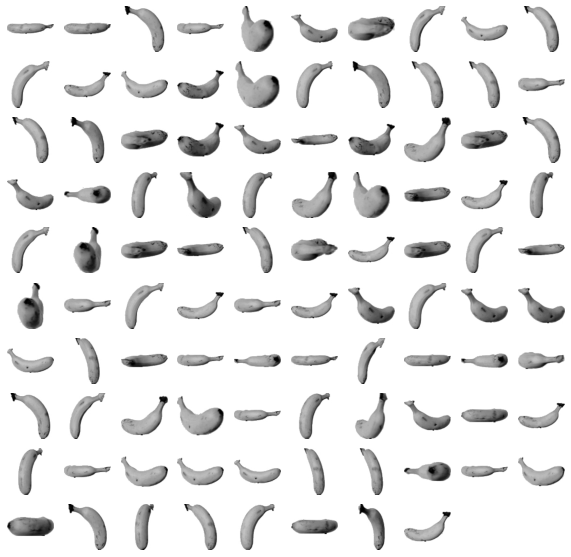

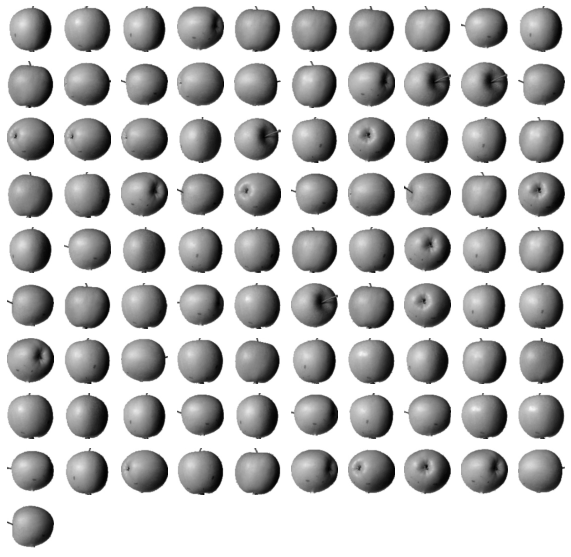

In [20]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

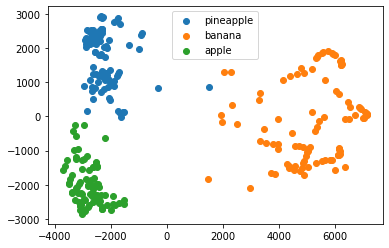

In [21]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])